# Tugas Kelompok Praktikum Damin Modul 5 Kelompok 7 RC
### Telco customer churn: IBM dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 138MB/s]


In [ ]:
!unzip  telco-customer-churn-ibm-dataset.zip

Archive:  telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## **Naive Bayes**

In [ ]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Data Analysis / Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df = df[['Gender','Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV']]
df.head()

,Gender,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Male,53.85,108.15,Yes,1,86,3239
1,Female,70.70,151.65,Yes,1,67,2701
2,Female,99.65,820.5,Yes,1,86,5372
3,Female,104.80,3046.05,Yes,1,84,5003
4,Male,103.70,5036.3,Yes,1,89,5340


In [ ]:
df.shape

(7043, 7)

In [ ]:
df.describe()

,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,0.265370,58.699418,4400.295755
std,30.090047,0.441561,21.525131,1183.057152
min,18.250000,0.000000,5.000000,2003.000000
25%,35.500000,0.000000,40.000000,3469.000000
50%,70.350000,0.000000,61.000000,4527.000000
75%,89.850000,1.000000,75.000000,5380.500000
max,118.750000,1.000000,100.000000,6500.000000


In [ ]:
df.isnull().sum()

Gender             0
Monthly Charges    0
Total Charges      0
Churn Label        0
Churn Value        0
Churn Score        0
CLTV               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### EDA

<Axes: xlabel='Monthly Charges', ylabel='Count'>

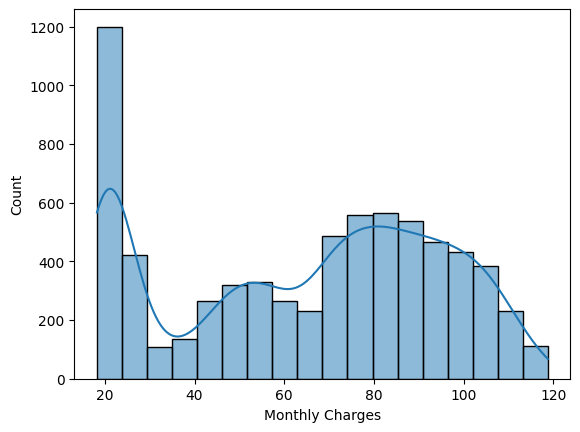

In [ ]:
sns.histplot(df['Monthly Charges'], kde = True)

### Encoding

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender'].replace({'Male':1, 'Female':0},inplace = True)
df.head()

,Gender,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,53.85,108.15,Yes,1,86,3239
1,0,70.70,151.65,Yes,1,67,2701
2,0,99.65,820.5,Yes,1,86,5372
3,0,104.80,3046.05,Yes,1,84,5003
4,1,103.70,5036.3,Yes,1,89,5340


In [ ]:
df['Churn Label'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Churn Label'].replace({'Yes':1, 'No':0},inplace = True)
df.head()

,Gender,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,53.85,108.15,1,1,86,3239
1,0,70.70,151.65,1,1,67,2701
2,0,99.65,820.5,1,1,86,5372
3,0,104.80,3046.05,1,1,84,5003
4,1,103.70,5036.3,1,1,89,5340


### Correlation matrix

In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Gender,Monthly Charges,Churn Label,Churn Value,Churn Score,CLTV
Gender,1.000000,-0.014569,-0.008612,-0.008612,0.000311,-0.006851
Monthly Charges,-0.014569,1.000000,0.193356,0.193356,0.133754,0.098693
Churn Label,-0.008612,0.193356,1.000000,1.000000,0.664897,-0.127463
Churn Value,-0.008612,0.193356,1.000000,1.000000,0.664897,-0.127463
Churn Score,0.000311,0.133754,0.664897,0.664897,1.000000,-0.079782
CLTV,-0.006851,0.098693,-0.127463,-0.127463,-0.079782,1.000000


<ipython-input-15-94a92626f4bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)


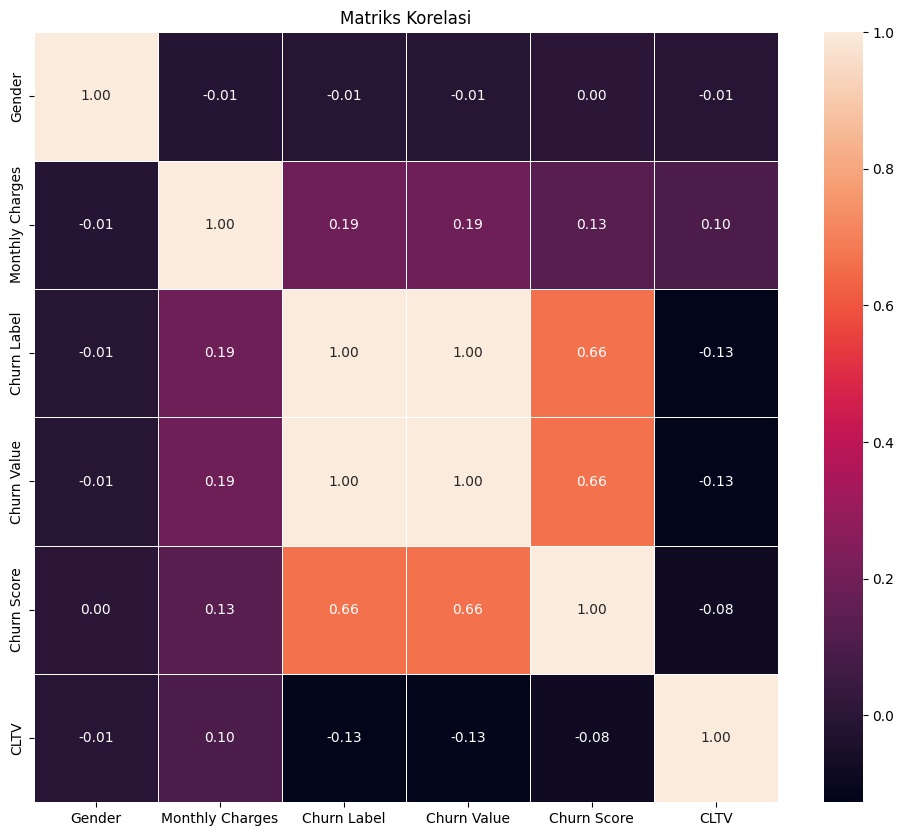

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

### Split Data

#### Variabel Independen / Dependen

In [ ]:
# Split data into dependent/independent variables
X = df[['Monthly Charges', 'Churn Score']].values
y = df['Churn Label'].values

#### Train / Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((5282, 2), (1761, 2))

#### Feature scaling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predict result / Score model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


### Evaluasi model

#### Akurasi

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.86


#### Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1317
           1       0.71      0.77      0.74       444

    accuracy                           0.86      1761
   macro avg       0.82      0.83      0.82      1761
weighted avg       0.87      0.86      0.87      1761



#### F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.740499457111835


#### Confusion matrix

<Axes: >

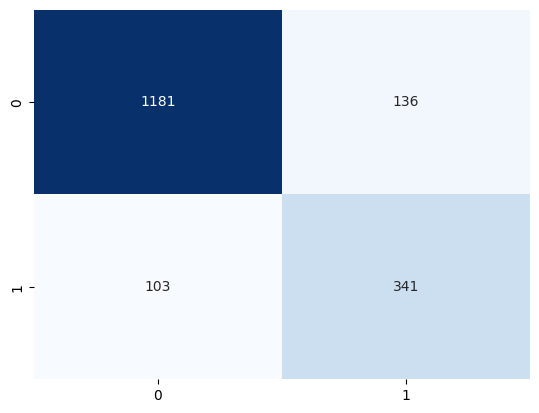

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

#### Precision-Recall curve

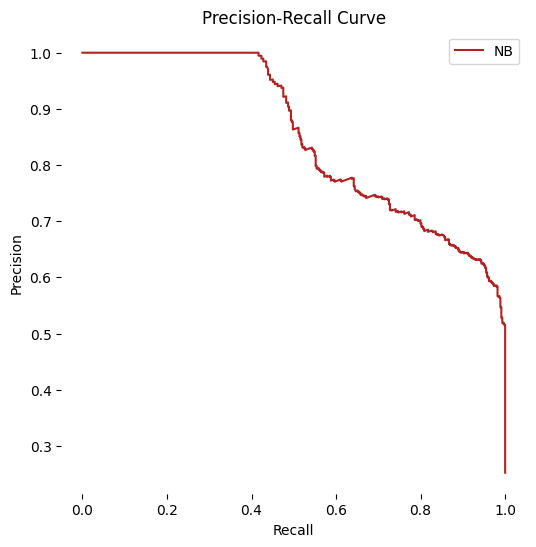

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='NB', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

#### AUC/ROC curve

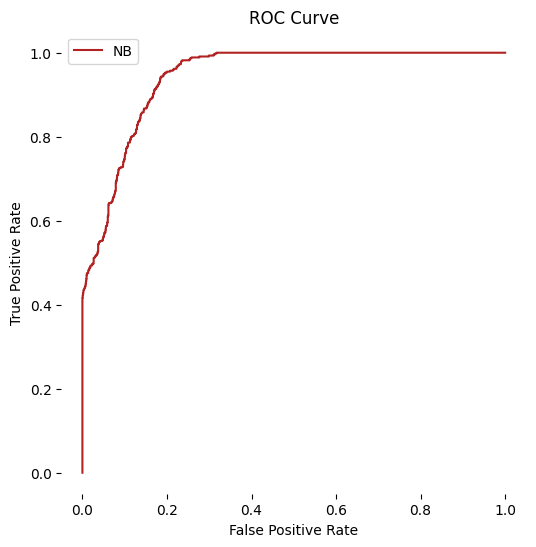

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='NB', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Visualization predictions

#### Prediction results on the training set

<ipython-input-36-48dafec2d377>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


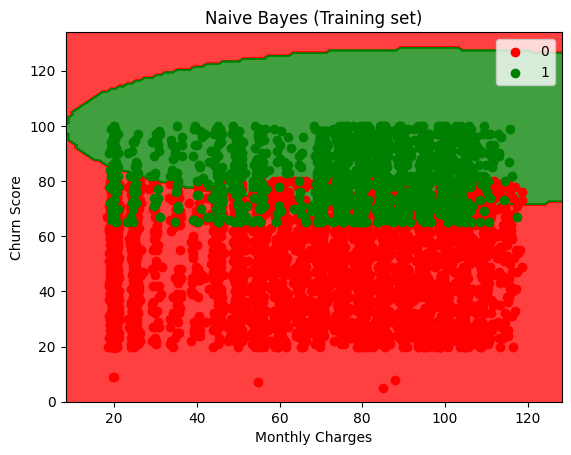

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 5, stop = X_set[:, 1].max() + 35, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

<ipython-input-49-5a3d911a6ec9>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


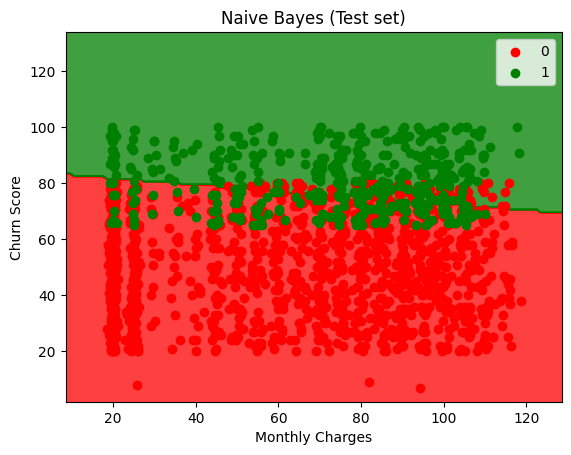

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 5, stop = X_set[:, 1].max() + 35, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

In [ ]:
print(classifier.predict(sc.transform([[95, 60]])))

[0]


# **Klasifikasi Support Vector Machine(SVM)**

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into dependent/independent variables
X = df[['Monthly Charges', 'Churn Score']].values
y = df['Churn Label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((5282, 2), (1761, 2))

### Features Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train model

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predict result / Score model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


### Evaluasi model

####  Akurasi

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.87


#### Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1317
           1       0.77      0.67      0.72       444

    accuracy                           0.87      1761
   macro avg       0.83      0.80      0.81      1761
weighted avg       0.86      0.87      0.86      1761



#### F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.7158403869407497


####  Confusion matrix

<Axes: >

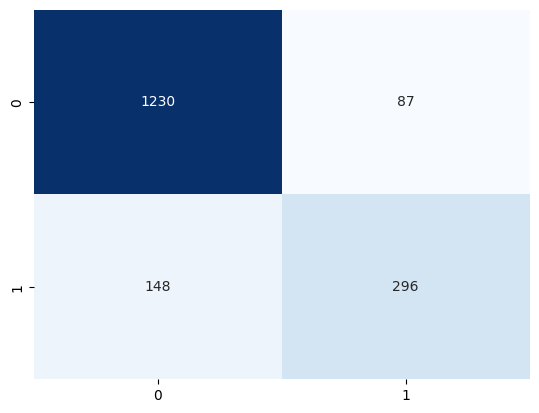

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

#### Precision-Recall curve

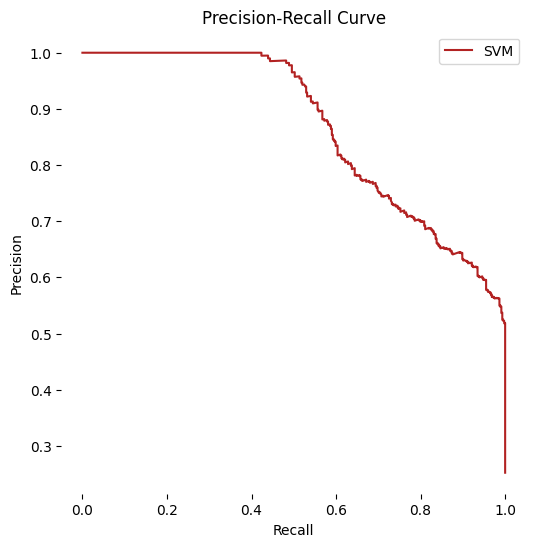

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

####  AUC/ROC curve

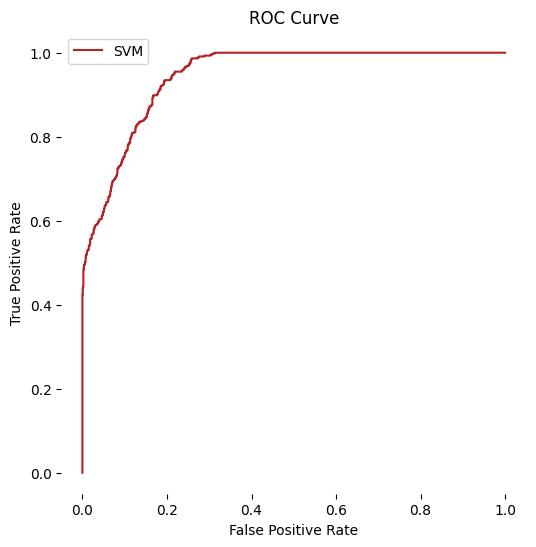

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Visualization predictions

#### Prediction results on the training set

<ipython-input-64-ae809ffd4440>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


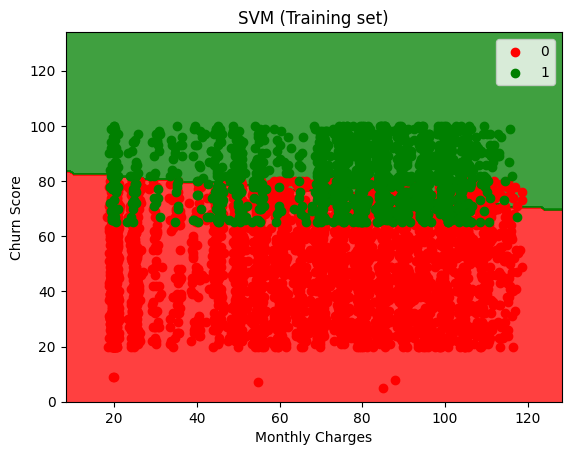

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 5, stop = X_set[:, 1].max() + 35, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

#### Prediction results on the test set

<ipython-input-65-ab8b65b91568>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


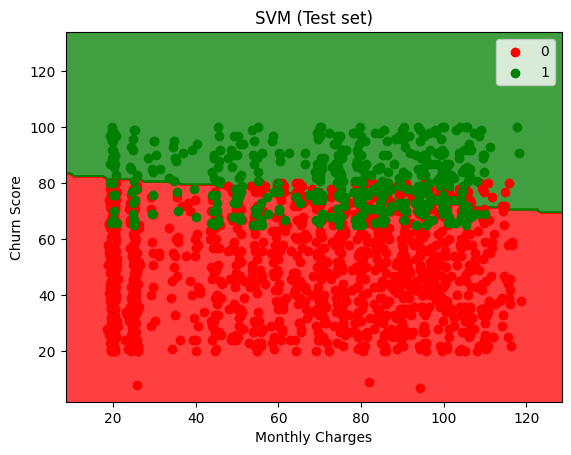

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 5, stop = X_set[:, 1].max() + 35, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Score')
plt.legend()
plt.show()

## **Analisis perbandingan hasil evaluasi performa Naïve Bayes vs, Support Vector Machine (SVM)**

<table>
  <thead>
    <tr>
      <th>Metrik</th>
      <th>Naive Bayes</th>
      <th>SVM</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Akurasi</td>
      <td>0.86</td>
      <td>0.87</td>
    </tr>
    <tr>
      <td>F1 Score</td>
      <td>0.74</td>
      <td>0.72</td>
    </tr>
    <tr>
      <td>Precision (class 0)</td>
      <td>0.92</td>
      <td>0.89</td>
    </tr>
    <tr>
      <td>Precision (class 1)</td>
      <td>0.71</td>
      <td>0.77</td>
    </tr>
    <tr>
      <td>Recall (class 0)</td>
      <td>0.90</td>
      <td>0.93</td>
    </tr>
    <tr>
      <td>Recall (class 1)</td>
      <td>0.77</td>
      <td>0.67</td>
    </tr>
    <tr>
      <td>Macro Avg (Precision)</td>
      <td>0.82</td>
      <td>0.83</td>
    </tr>
    <tr>
      <td>Macro Avg (Recall)</td>
      <td>0.83</td>
      <td>0.80</td>
    </tr>
    <tr>
      <td>Weighted Avg (Precision)</td>
      <td>0.87</td>
      <td>0.86</td>
    </tr>
    <tr>
      <td>Weighted Avg (Recall)</td>
      <td>0.86</td>
      <td>0.87</td>
    </tr>
  </tbody>
</table>


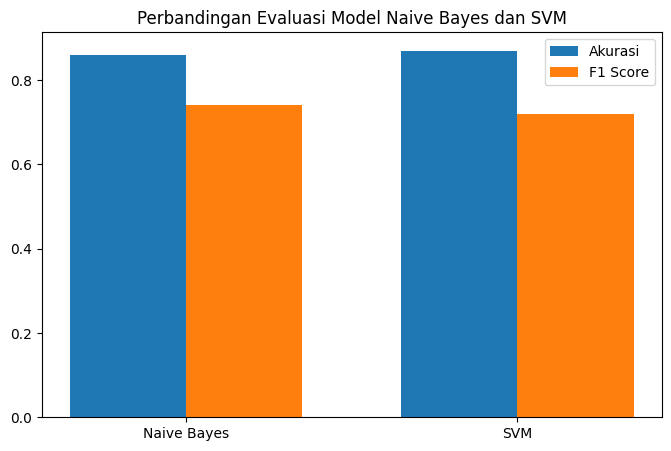

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Naive Bayes', 'SVM']
accuracy = [0.86, 0.87]
f1_score = [0.74, 0.72]

fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
bar1 = ax.bar(np.arange(len(models)), accuracy, bar_width, label='Akurasi')
bar2 = ax.bar(np.arange(len(models)) + bar_width, f1_score, bar_width, label='F1 Score')

ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.title('Perbandingan Evaluasi Model Naive Bayes dan SVM')
plt.show()


#### 1. Akurasi:
- SVM memiliki akurasi yang sedikit lebih tinggi dibandingkan dengan Naive Bayes (0.87 vs. 0.86). Ini menunjukkan bahwa SVM mungkin lebih baik dalam mengklasifikasikan data pada dataset tertentu.

#### 2. F1 Score:
- Naive Bayes memiliki F1 Score yang sedikit lebih tinggi dibandingkan dengan SVM (0.74 vs. 0.72). F1 Score mengukur keseimbangan antara precision dan recall, dan dalam kasus ini, Naive Bayes lebih baik dalam mencapai keseimbangan tersebut.

#### 3. Precision dan Recall:
- Untuk kelas 0, Naive Bayes memiliki precision yang lebih tinggi, sementara SVM memiliki recall yang lebih tinggi. Ini menunjukkan bahwa Naive Bayes lebih baik dalam mengidentifikasi instance positif dari kelas 0, sedangkan SVM lebih baik dalam meminimalkan instance positif kelas 0 yang terlewat.
- Untuk kelas 1, SVM memiliki precision yang lebih tinggi, tetapi Naive Bayes memiliki recall yang lebih tinggi. Ini menunjukkan bahwa SVM lebih hati-hati dalam mengklasifikasikan instance sebagai positif kelas 1, sedangkan Naive Bayes lebih baik dalam mengidentifikasi semua instance positif kelas 1.

#### 4. Macro dan Weighted Average:
- Secara keseluruhan, kedua model memiliki nilai rata-rata yang cukup serupa untuk metrik macro dan weighted average, menunjukkan bahwa performa keduanya relatif sebanding.